In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
from numpy import absolute
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score,r2_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

ModuleNotFoundError: No module named 'yellowbrick'

In [3]:
df = pd.read_csv("/Users/mayur/Desktop/ALDA Project/Crime_Data_from_2020_to_Present 2.csv")

In [4]:
df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  201220752  09/16/2020 12:00:00 AM  09/16/2020 12:00:00 AM      1230    12   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2  77th Street         1259         2     745   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  Status Desc  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO  Adult Other   
1                           BATTERY - SIMPLE ASSAULT  ...     IC  Invest Cont   
2           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC  Invest Cont   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC  Invest Cont   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC  Invest Cont   

  Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0    624.0      NaN       NaN      NaN   
1    624.0      NaN       NaN      NaN   
2    745.0      NaN       NaN      NaN   
3    745.0    998.0       NaN      NaN   
4    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    700 E  73RD                         ST          NaN  33.9739 -118.2630  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [5]:
df.describe().T

count          mean           std       min           25%  \
DR_NO           317854.0  2.050625e+08  4.965168e+06  817.0000  2.009132e+08   
TIME OCC        317854.0  1.352763e+03  6.500014e+02    1.0000  9.200000e+02   
AREA            317854.0  1.079886e+01  6.039124e+00    1.0000  6.000000e+00   
Rpt Dist No     317854.0  1.126046e+03  6.040058e+02  101.0000  6.280000e+02   
Part 1-2        317854.0  1.412765e+00  4.923320e-01    1.0000  1.000000e+00   
Crm Cd          317854.0  5.089288e+02  2.103386e+02  110.0000  3.300000e+02   
Vict Age        317854.0  3.007335e+01  2.171658e+01   -1.0000  1.200000e+01   
Premis Cd       317849.0  2.944511e+02  2.129494e+02  101.0000  1.010000e+02   
Weapon Used Cd  116477.0  3.625238e+02  1.231582e+02  101.0000  3.080000e+02   
Crm Cd 1        317851.0  5.086576e+02  2.101257e+02  110.0000  3.300000e+02   
Crm Cd 2         25981.0  9.554274e+02  1.160663e+02  210.0000  9.980000e+02   
Crm Cd 3           880.0  9.823761e+02  5.363315e+01  626.0000  9.980000e+02   
Crm Cd 4            30.0  9.898667e+02  3.422515e+01  821.0000  9.980000e+02   
LAT             317854.0  3.382510e+01  2.893775e+00    0.0000  3.400780e+01   
LON             317854.0 -1.174956e+02  1.004482e+01 -118.6676 -1.184296e+02   

                         50%           75%           max  
DR_NO           2.018096e+08  2.108086e+08  2.199178e+08  
TIME OCC        1.430000e+03  1.900000e+03  2.359000e+03  
AREA            1.100000e+01  1.600000e+01  2.100000e+01  
Rpt Dist No     1.149000e+03  1.621000e+03  2.199000e+03  
Part 1-2        1.000000e+00  2.000000e+00  2.000000e+00  
Crm Cd          5.100000e+02  6.260000e+02  9.560000e+02  
Vict Age        3.100000e+01  4.500000e+01  1.200000e+02  
Premis Cd       2.030000e+02  5.010000e+02  9.710000e+02  
Weapon Used Cd  4.000000e+02  4.000000e+02  5.160000e+02  
Crm Cd 1        5.100000e+02  6.260000e+02  9.560000e+02  
Crm Cd 2        9.980000e+02  9.980000e+02  9.990000e+02  
Crm Cd 3        9.980000e+02  9.980000e+02  9.990000e+02  
Crm Cd 4        9.980000e+02  9.980000e+02  9.990000e+02  
LAT             3.405740e+01  3.416290e+01  3.433430e+01  
LON            -1.183213e+02 -1.182740e+02  0.000000e+00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317854 entries, 0 to 317853
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           317854 non-null  int64  
 1   Date Rptd       317854 non-null  object 
 2   DATE OCC        317854 non-null  object 
 3   TIME OCC        317854 non-null  int64  
 4   AREA            317854 non-null  int64  
 5   AREA NAME       317854 non-null  object 
 6   Rpt Dist No     317854 non-null  int64  
 7   Part 1-2        317854 non-null  int64  
 8   Crm Cd          317854 non-null  int64  
 9   Crm Cd Desc     317854 non-null  object 
 10  Mocodes         274531 non-null  object 
 11  Vict Age        317854 non-null  int64  
 12  Vict Sex        276448 non-null  object 
 13  Vict Descent    276443 non-null  object 
 14  Premis Cd       317849 non-null  float64
 15  Premis Desc     317746 non-null  object 
 16  Weapon Used Cd  116477 non-null  float64
 17  Weapon Des

In [7]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            43323
Vict Age               0
Vict Sex           41406
Vict Descent       41411
Premis Cd              5
Premis Desc          108
Weapon Used Cd    201377
Weapon Desc       201377
Status                 0
Status Desc            0
Crm Cd 1               3
Crm Cd 2          291873
Crm Cd 3          316974
Crm Cd 4          317824
LOCATION               0
Cross Street      260877
LAT                    0
LON                    0
dtype: int64

In [8]:
#Droping unsuccessful columns 
df = df.drop(['Cross Street','Crm Cd 4','Crm Cd 3','Crm Cd 2','Weapon Desc','Weapon Used Cd','Vict Descent','Vict Sex','Mocodes'],axis=1)


In [9]:
#numeric variables
df.select_dtypes(exclude='object').isnull().sum()

DR_NO          0
TIME OCC       0
AREA           0
Rpt Dist No    0
Part 1-2       0
Crm Cd         0
Vict Age       0
Premis Cd      5
Crm Cd 1       3
LAT            0
LON            0
dtype: int64

In [10]:
median_value = df['Crm Cd 1'].median()
df['Crm Cd 1'] = df['Crm Cd 1'].fillna(median_value)

# Replace Blanks with Most Probable Values

In [11]:
df.select_dtypes(include='object').isnull().sum()

Date Rptd        0
DATE OCC         0
AREA NAME        0
Crm Cd Desc      0
Premis Desc    108
Status           0
Status Desc      0
LOCATION         0
dtype: int64

In [12]:
cleaner = SimpleImputer(strategy='most_frequent')

In [13]:
value = df['Premis Desc'].values.reshape(-1, 1)

In [14]:
df['Premis Desc'] = cleaner.fit_transform(value)

In [15]:
value = df['Premis Cd'].values.reshape(-1, 1)

In [16]:
df['Premis Cd'] = cleaner.fit_transform(value)

In [17]:
df.isnull().sum()

DR_NO          0
Date Rptd      0
DATE OCC       0
TIME OCC       0
AREA           0
AREA NAME      0
Rpt Dist No    0
Part 1-2       0
Crm Cd         0
Crm Cd Desc    0
Vict Age       0
Premis Cd      0
Premis Desc    0
Status         0
Status Desc    0
Crm Cd 1       0
LOCATION       0
LAT            0
LON            0
dtype: int64

In [18]:
#transforming date columns to datetime fromat
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# **Encoding Categorical Variables


In [19]:
 df.select_dtypes(include='object')

AREA NAME                                        Crm Cd Desc  \
0         Southwest                           BATTERY - SIMPLE ASSAULT   
1           Central                           BATTERY - SIMPLE ASSAULT   
2       77th Street           VANDALISM - MISDEAMEANOR ($399 OR UNDER)   
3       N Hollywood           VANDALISM - MISDEAMEANOR ($399 OR UNDER)   
4           Mission  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
...             ...                                                ...   
317849  77th Street                                   VEHICLE - STOLEN   
317850       Harbor                                 FALSE IMPRISONMENT   
317851   Devonshire                           BATTERY - SIMPLE ASSAULT   
317852    Southwest                                      THEFT, PERSON   
317853      Olympic                                   VEHICLE - STOLEN   

                                         Premis Desc Status   Status Desc  \
0                             SINGLE FAMILY DWELLING     AO   Adult Other   
1                                           SIDEWALK     IC   Invest Cont   
2       MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     IC   Invest Cont   
3       MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     IC   Invest Cont   
4                                BEAUTY SUPPLY STORE     IC   Invest Cont   
...                                              ...    ...           ...   
317849                                   PARKING LOT     IC   Invest Cont   
317850  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     AA  Adult Arrest   
317851                        SINGLE FAMILY DWELLING     IC   Invest Cont   
317852                                        STREET     IC   Invest Cont   
317853                                        STREET     IC   Invest Cont   

                                        LOCATION  
0        1100 W  39TH                         PL  
1         700 S  HILL                         ST  
2         700 E  73RD                         ST  
3        5400    CORTEEN                      PL  
4       14400    TITUS                        ST  
...                                          ...  
317849           58TH                         ST  
317850    200 W  2ND                          ST  
317851   8800    DEMPSEY                      AV  
317852           CRENSHAW                     BL  
317853   3300 W  8TH                          ST  

[317854 rows x 6 columns]

In [20]:
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].nunique())

AREA NAME 21
Crm Cd Desc 133
Premis Desc 302
Status 5
Status Desc 5
LOCATION 49731


In [21]:
df['AREA NAME'].unique()

array(['Southwest', 'Central', '77th Street', 'N Hollywood', 'Mission',
       'Southeast', 'Devonshire', 'Harbor', 'West Valley', 'West LA',
       'Pacific', 'Wilshire', 'Hollywood', 'Northeast', 'Hollenbeck',
       'Olympic', 'Newton', 'Topanga', 'Van Nuys', 'Foothill', 'Rampart'],
      dtype=object)

In [22]:

le = LabelEncoder()

In [23]:
df['AREA NAME'] = le.fit_transform(df['AREA NAME'])

In [24]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Premis Cd', 'Premis Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'LOCATION', 'LAT', 'LON'],
      dtype='object')

Crm Cd Desc column

In [25]:
df['Crm Cd Desc']

0                                  BATTERY - SIMPLE ASSAULT
1                                  BATTERY - SIMPLE ASSAULT
2                  VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3                  VANDALISM - MISDEAMEANOR ($399 OR UNDER)
4         VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
                                ...                        
317849                                     VEHICLE - STOLEN
317850                                   FALSE IMPRISONMENT
317851                             BATTERY - SIMPLE ASSAULT
317852                                        THEFT, PERSON
317853                                     VEHICLE - STOLEN
Name: Crm Cd Desc, Length: 317854, dtype: object

In [26]:
CrimeType = df['Crm Cd Desc'].apply(lambda x: x.split(' ')[0])
CrimeType

0           BATTERY
1           BATTERY
2         VANDALISM
3         VANDALISM
4         VANDALISM
            ...    
317849      VEHICLE
317850        FALSE
317851      BATTERY
317852       THEFT,
317853      VEHICLE
Name: Crm Cd Desc, Length: 317854, dtype: object

In [27]:
df.drop(columns=['Crm Cd Desc'], axis=1, inplace=True)

In [28]:
df.insert(5,'CrimeType',CrimeType)


In [29]:
df['CrimeType'] = le.fit_transform(df['CrimeType'])


Premis Desc Column

In [30]:
df['Premis Desc'].unique()


array(['SINGLE FAMILY DWELLING', 'SIDEWALK',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
       'BEAUTY SUPPLY STORE', 'NIGHT CLUB (OPEN EVENINGS ONLY)',
       'DEPARTMENT STORE', 'POLICE FACILITY', 'STREET', 'PARKING LOT',
       'HOTEL', "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)",
       'RESTAURANT/FAST FOOD', 'DAM/RESERVOIR', 'ALLEY', 'BUS STOP',
       'PUBLIC RESTROOM/OUTSIDE*', 'TRANSPORTATION FACILITY (AIRPORT)',
       'GARAGE/CARPORT', 'MTA BUS', 'MINI-MART', 'OTHER BUSINESS',
       'VEHICLE, PASSENGER/TRUCK', 'MARKET', 'OTHER STORE',
       'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)',
       'MTA - RED LINE - UNION STATION',
       'MTA - RED LINE - PERSHING SQUARE', 'DRUG STORE',
       "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS",
       'PARKING UNDERGROUND/BUILDING', 'HOSPITAL',
       'LA UNION STATION (NOT LINE SPECIFIC)', 'MISSIONS/SHELTERS',
       'LIQUOR STORE', 'BAR/COCKTAIL/NIGHTCLUB',
       'DETENTION/JAIL FACILITY', 'OTHER PREMI

In [31]:
CrimeSituation = df['Premis Desc'].apply(lambda x: x.split(' ')[0])
CrimeSituation

0             SINGLE
1           SIDEWALK
2         MULTI-UNIT
3         MULTI-UNIT
4             BEAUTY
             ...    
317849       PARKING
317850    MULTI-UNIT
317851        SINGLE
317852        STREET
317853        STREET
Name: Premis Desc, Length: 317854, dtype: object

In [32]:
df.drop(columns=['Premis Desc'], axis=1, inplace=True)
df.insert(5,'CrimeSituation',CrimeSituation)

In [33]:
df['CrimeSituation'] = le.fit_transform(df['CrimeSituation'])

drop this column

In [34]:
df['Status'].unique()
df.drop(columns=['Status'], axis=1, inplace=True)

Status Desc Column

In [35]:
df['Status Desc'].unique()

array(['Adult Other', 'Invest Cont', 'Adult Arrest', 'Juv Arrest',
       'Juv Other'], dtype=object)

In [36]:
ohe = OneHotEncoder(sparse=False)
df['Status Desc'] = ohe.fit_transform(df['Status Desc'].values.reshape(-1, 1))

LOCATION Column

In [37]:
df['LOCATION'].unique() 

array(['1100 W  39TH                         PL',
       '700 S  HILL                         ST',
       '700 E  73RD                         ST', ...,
       '3400    MARGUERITE                   ST',
       '1400 S  DE LA TORRE                  WY',
       '23100    FRIAR                        ST'], dtype=object)

In [38]:
df.drop(columns=['LOCATION'], axis=1, inplace=True)
df.drop(columns=['DR_NO'], axis=1, inplace=True)

In [39]:

df.head()

Date Rptd   DATE OCC  TIME OCC  AREA  CrimeSituation  CrimeType  AREA NAME  \
0 2020-01-08 2020-01-08      2230     3             150          3         15   
1 2020-01-02 2020-01-01       330     1             149          3          1   
2 2020-09-16 2020-09-16      1230    12             111         80          0   
3 2020-01-01 2020-01-01      1730    15             111         80          8   
4 2020-01-01 2020-01-01       415    19              19         80          7   

   Rpt Dist No  Part 1-2  Crm Cd  Vict Age  Premis Cd  Status Desc  Crm Cd 1  \
0          377         2     624        36      501.0          0.0     624.0   
1          163         2     624        25      102.0          0.0     624.0   
2         1259         2     745        62      502.0          0.0     745.0   
3         1543         2     745        76      502.0          0.0     745.0   
4         1998         2     740        31      409.0          0.0     740.0   

       LAT       LON  
0  34.0141 -118.2978  
1  34.0459 -118.2545  
2  33.9739 -118.2630  
3  34.1685 -118.4019  
4  34.2198 -118.4468

In [40]:
data = df.copy()
data.drop(columns=['Date Rptd','DATE OCC'],axis=1, inplace=True)
len(data.columns)

14

# Vizulation data

<Axes: xlabel='AREA', ylabel='Count'>

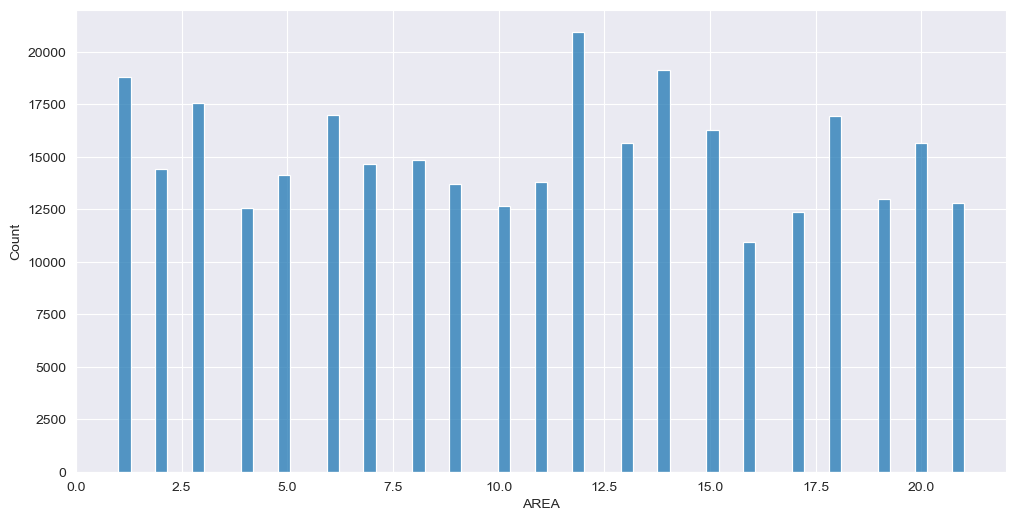

In [41]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data['AREA'])

<Axes: xlabel='CrimeSituation', ylabel='Count'>

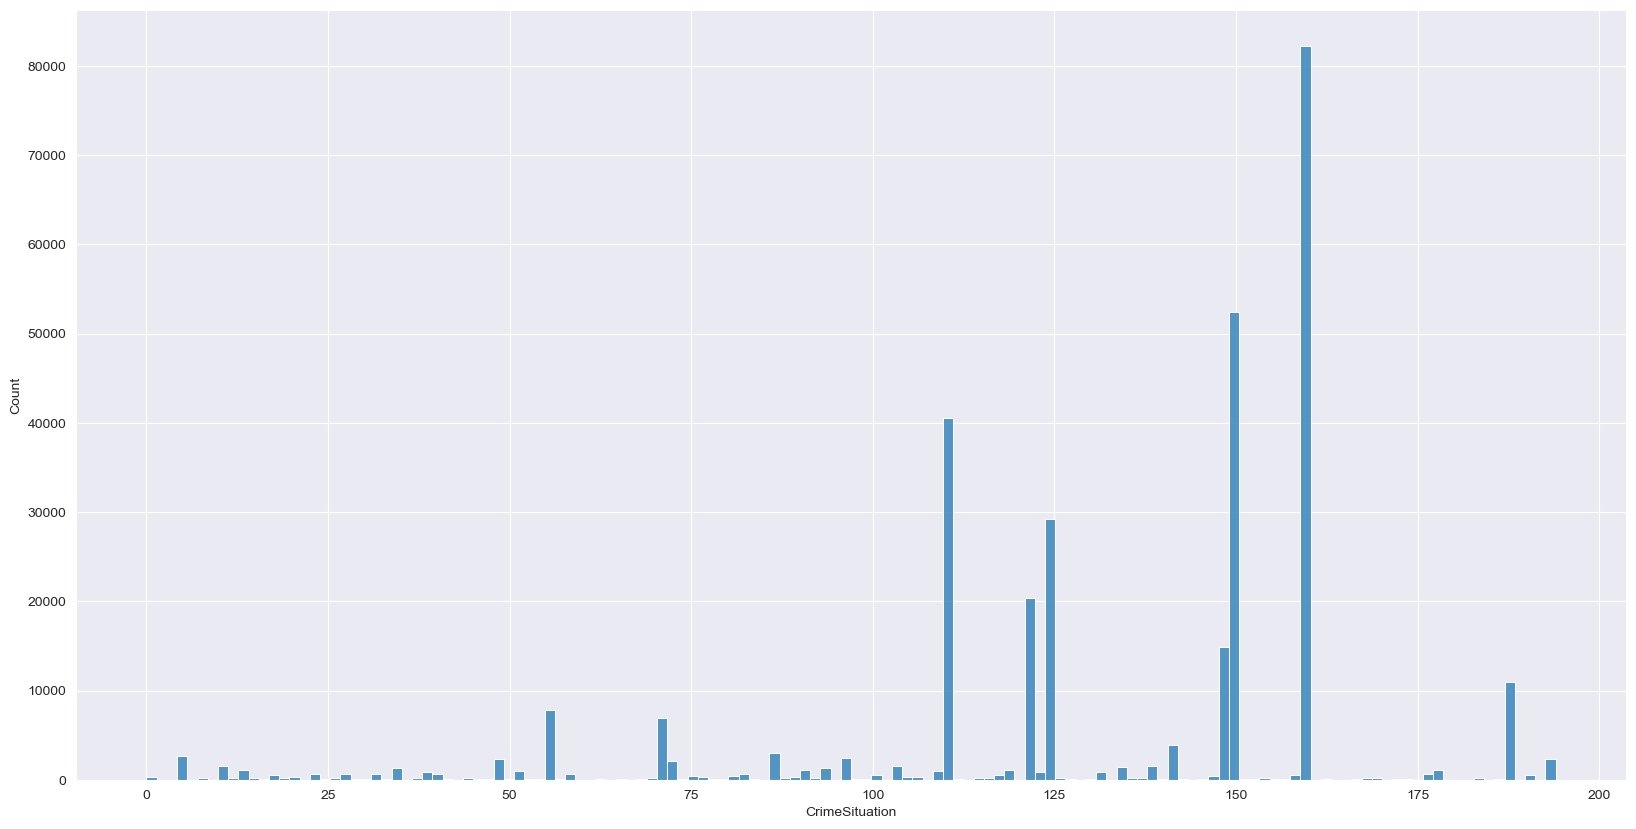

In [42]:
plt.figure(figsize=(20,10))
sns.histplot(data['CrimeSituation'])

<Axes: xlabel='AREA', ylabel='CrimeSituation'>

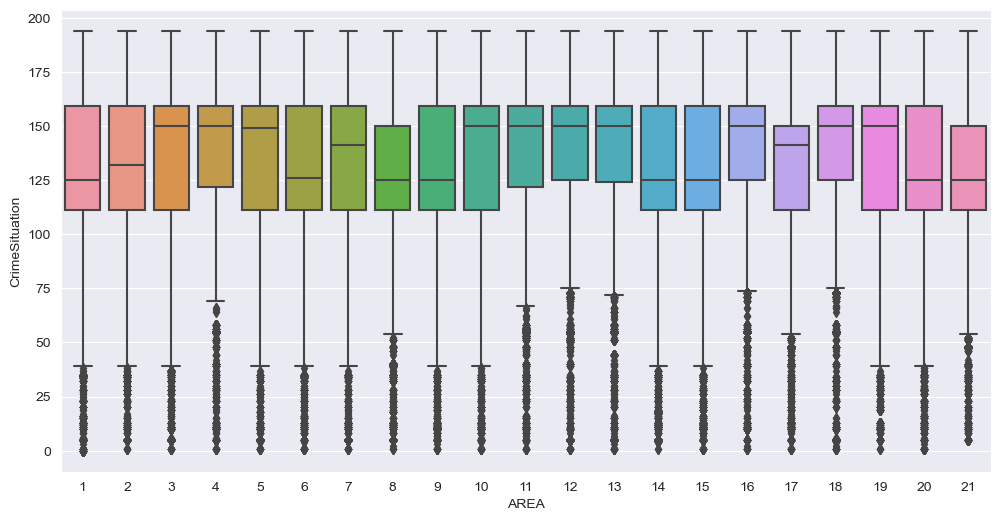

In [43]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= data['AREA'], y=data['CrimeSituation'])

<Axes: xlabel='AREA', ylabel='Vict Age'>

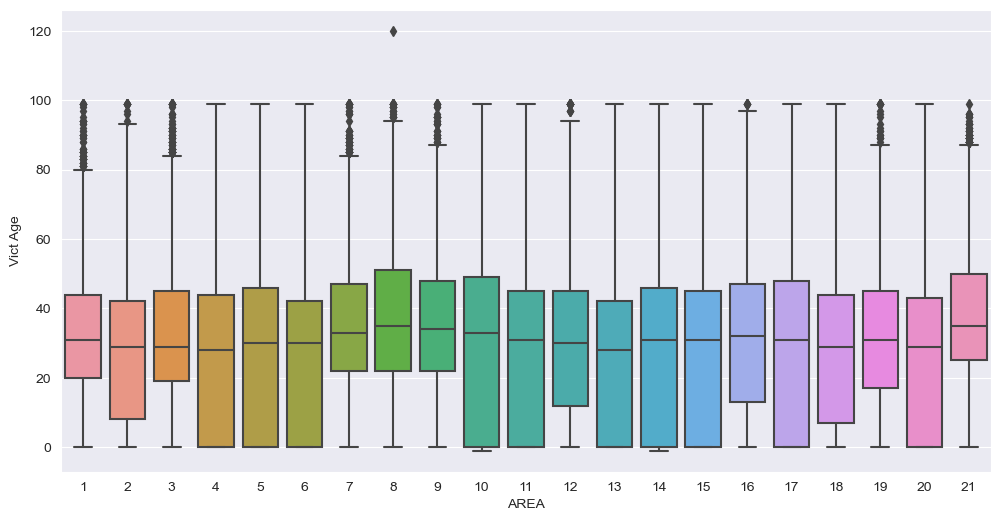

In [44]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= data['AREA'], y=data['Vict Age'])

<Axes: xlabel='AREA', ylabel='CrimeType'>

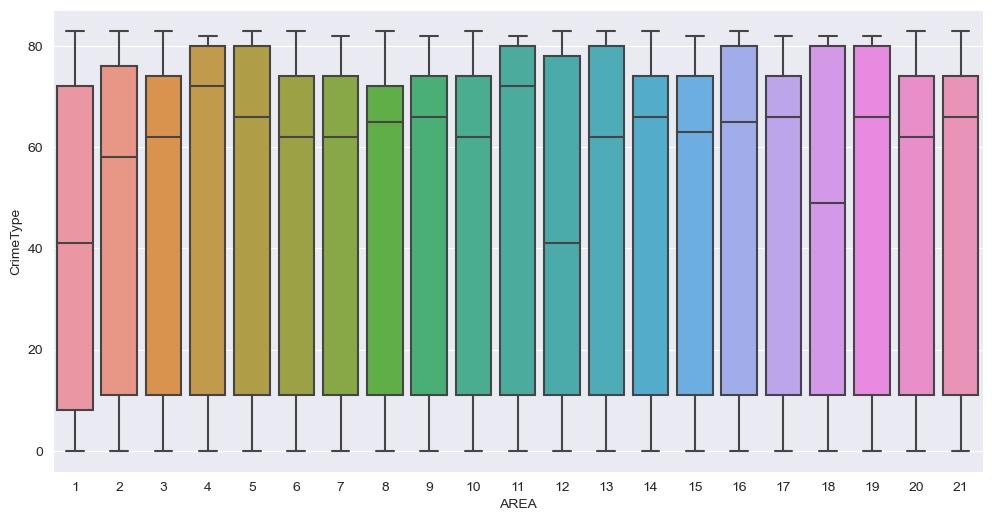

In [45]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= data['AREA'], y=data['CrimeType'])

<Axes: ylabel='AREA'>

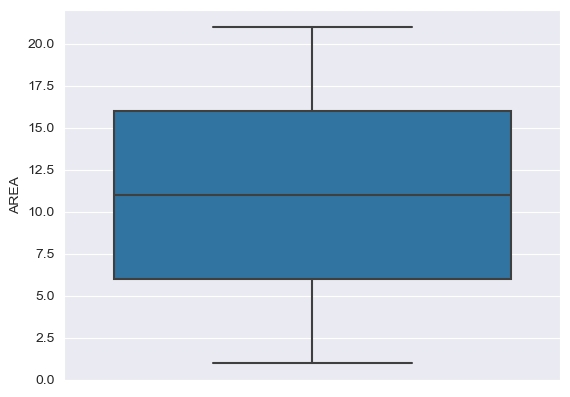

In [46]:
sns.boxplot(y = data['AREA'])

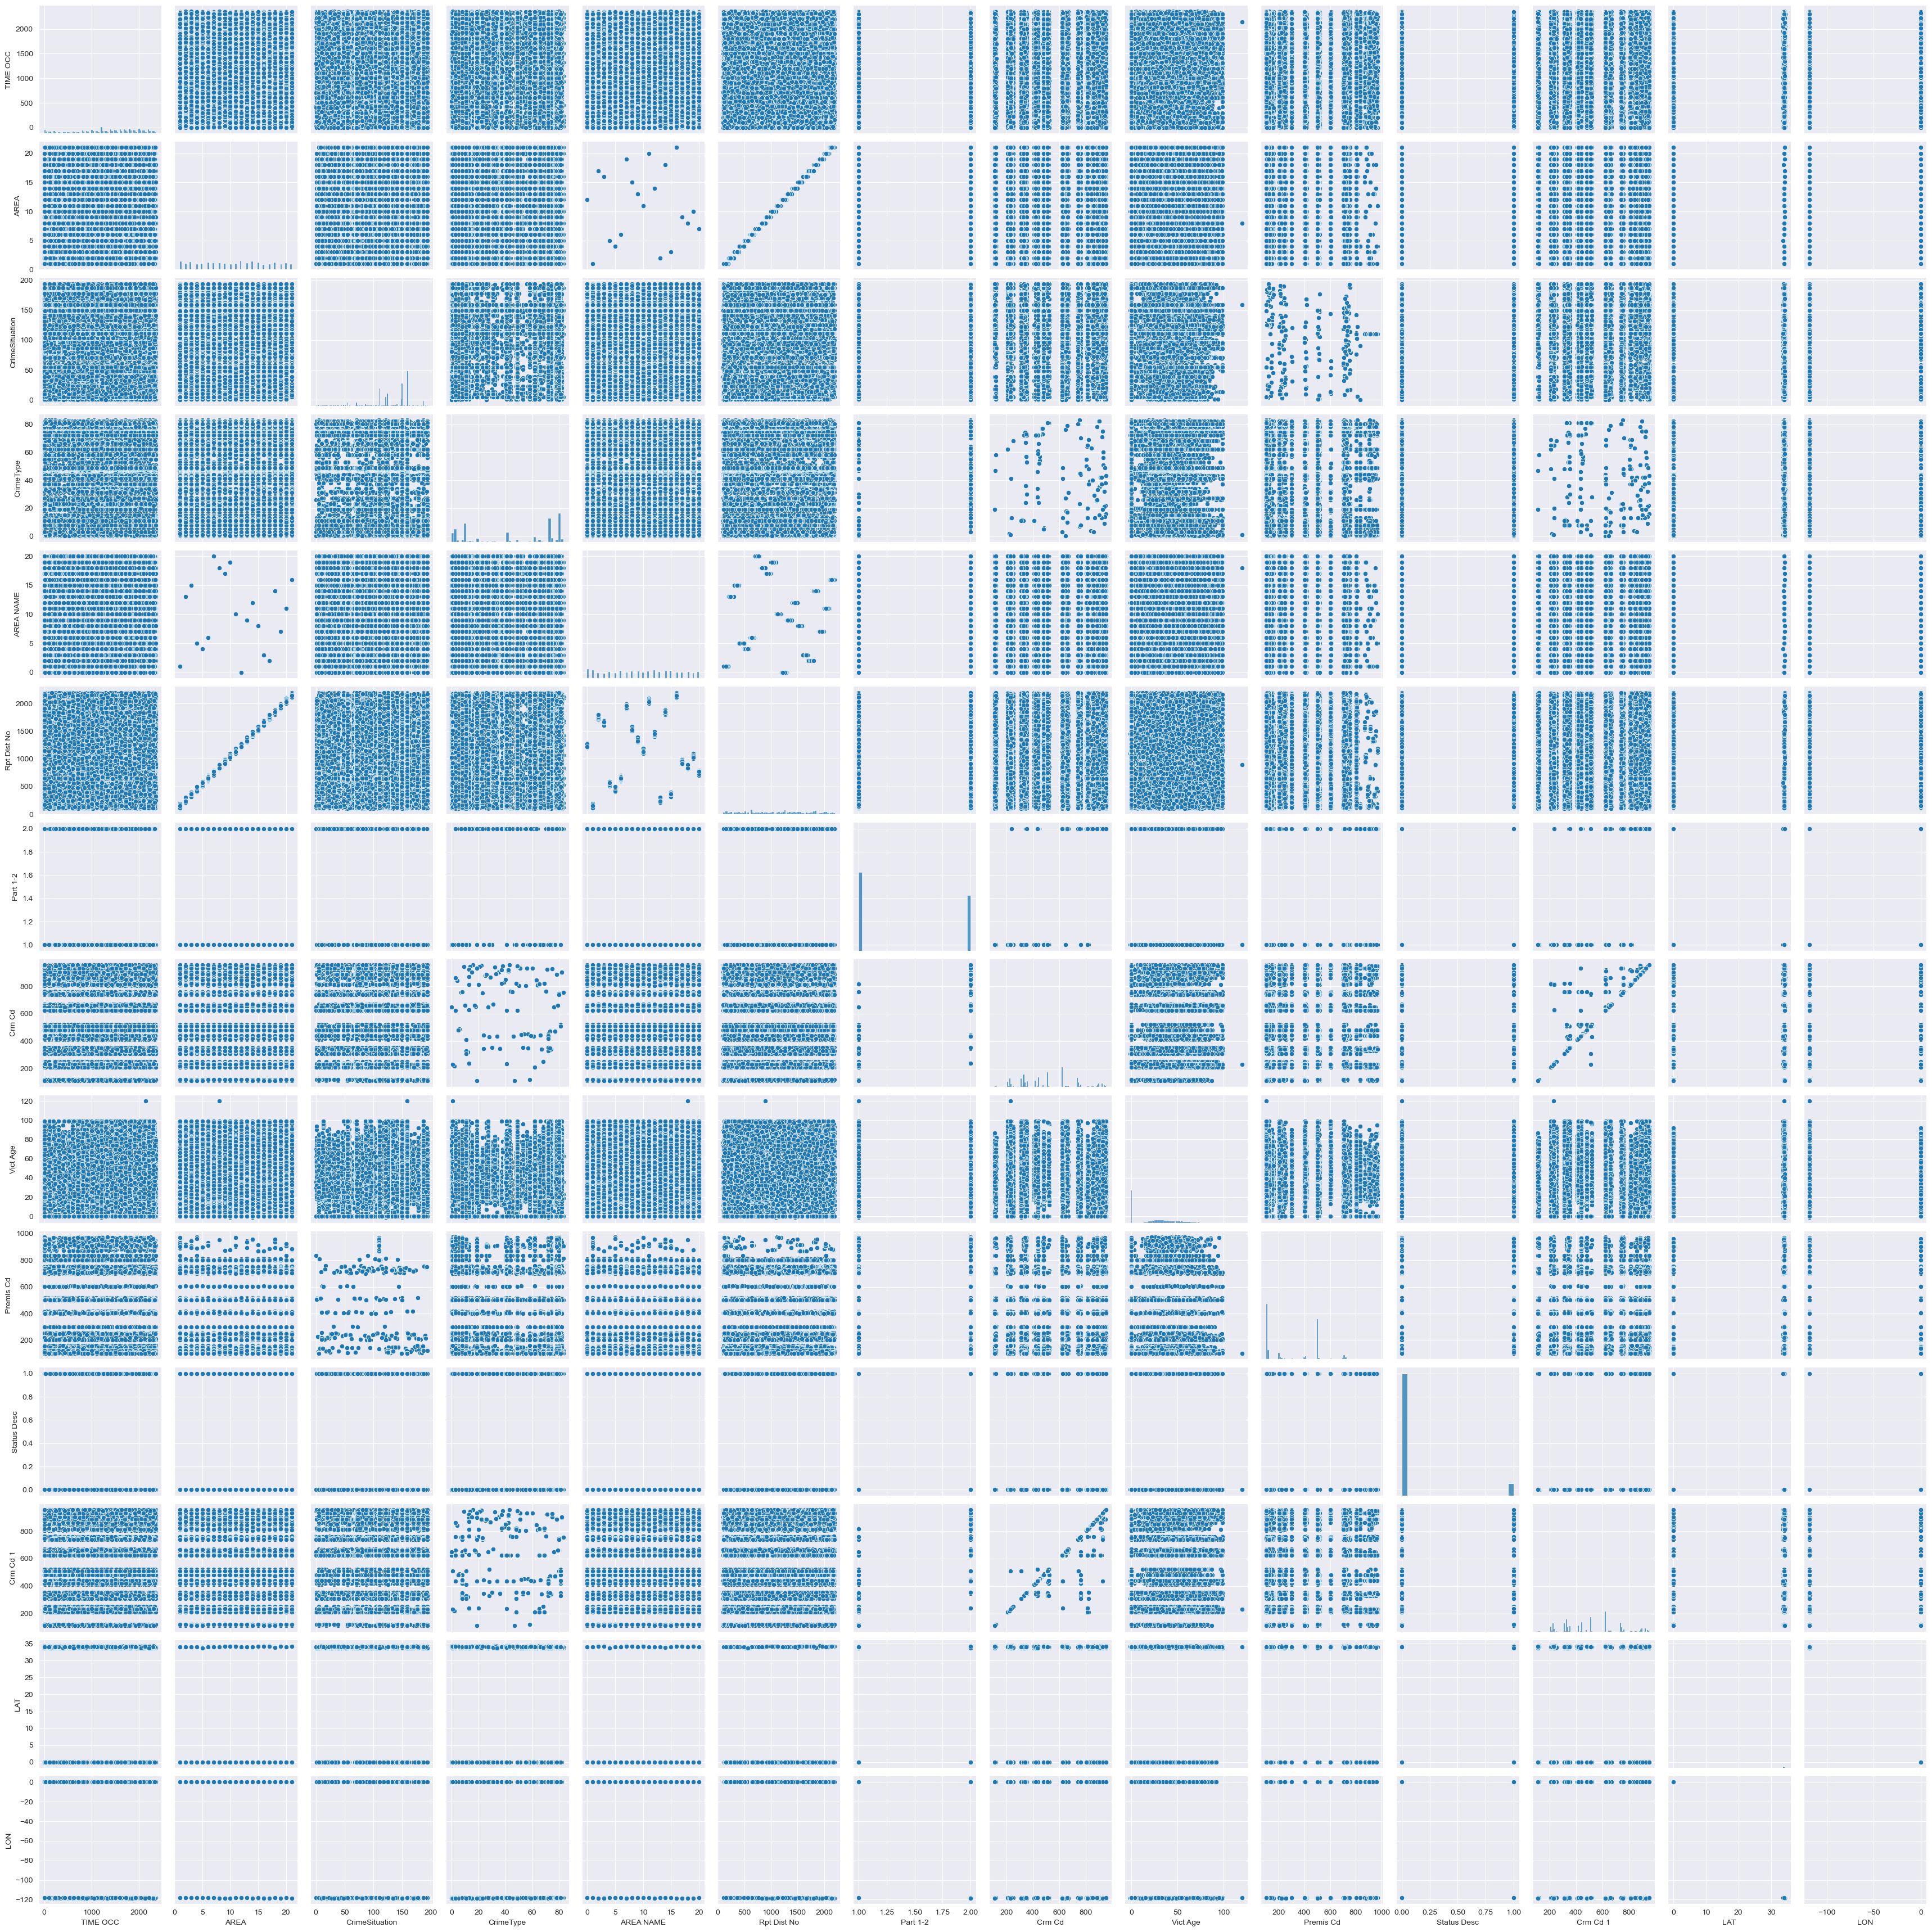

In [47]:
sns.pairplot(data)

# Split Data

In [41]:
y = data.pop('Premis Cd')

In [42]:
y.shape

(317854,)

In [43]:
x = data
x.shape


(317854, 13)

# Correlation using mutual information

In [44]:
selector = SelectKBest(mutual_info_regression, k= 6)

In [45]:
y.isnull().sum()

0

In [46]:
selector.fit(x,y)

SelectKBest(k=6, score_func=<function mutual_info_regression at 0x7fc3e30a67a0>)

In [47]:
selector.transform(x)

array([[ 150.    ,    3.    ,  377.    ,  624.    ,  624.    , -118.2978],
       [ 149.    ,    3.    ,  163.    ,  624.    ,  624.    , -118.2545],
       [ 111.    ,   80.    , 1259.    ,  745.    ,  745.    , -118.263 ],
       ...,
       [ 150.    ,    3.    , 1798.    ,  624.    ,  624.    , -118.4775],
       [ 159.    ,   73.    ,  363.    ,  350.    ,  350.    , -118.3351],
       [ 159.    ,   81.    , 2034.    ,  510.    ,  510.    , -118.3022]])

In [48]:
x.columns[selector.get_support()]

Index(['CrimeSituation', 'CrimeType', 'Rpt Dist No', 'Crm Cd', 'Crm Cd 1',
       'LON'],
      dtype='object')

In [49]:
x = data[['CrimeSituation', 'CrimeType', 'Rpt Dist No', 'Crm Cd', 'Crm Cd 1',
       'LON']]

In [50]:
x.head()

CrimeSituation  CrimeType  Rpt Dist No  Crm Cd  Crm Cd 1       LON
0             150          3          377     624     624.0 -118.2978
1             149          3          163     624     624.0 -118.2545
2             111         80         1259     745     745.0 -118.2630
3             111         80         1543     745     745.0 -118.4019
4              19         80         1998     740     740.0 -118.4468

In [51]:
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3)

In [52]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(222497, 6) (222497, 1) (95357, 6) (95357, 1)


# ****Decision Tree Regression

In [66]:
dec = DecisionTreeClassifier().fit(x_train,y_train)
print('Training R_SQ:%.3f'% dec.score(x_train,y_train))

Training R_SQ:0.994


In [67]:
y_train_prd = dec.predict(x_train)

Training Model Evaluation

In [68]:
print('r_sq:',r2_score(y_train,y_train_prd),
    'the MAE:',mean_absolute_error(y_train,y_train_prd),
    'the MsE:',mean_squared_error(y_train,y_train_prd),
    'The EVS:',explained_variance_score(y_train,y_train_prd))


r_sq: 0.9952165549613634 the MAE: 0.2575360566659326 the MsE: 19.58913153885221 The EVS: 0.9952258282932117


Test Model Evaluation

In [69]:
y_test_pred = dec.predict(x_test)
print('Training R_SQ:%.3f'% dec.score(x_test,y_test_pred))

Training R_SQ:1.000


In [70]:
print('r_sq:',r2_score(y_test,y_test_pred),
    'the MAE:',mean_absolute_error(y_test,y_test_pred),
    'the MsE:',mean_squared_error(y_test,y_test_pred),
    'The EVS:',explained_variance_score(y_test,y_test_pred))
cnt=0
# for i in range(len(y_test)):
#     if y_test == y_test_pred:
#         cnt+=1
# np.sum(y_test == y_test_pred)
accuracy = np.sum(y_test == y_test_pred) / len(y_test)
print(np.count_nonzero(y_test == y_test_pred),len(y_test),accuracy)

r_sq: 0.9484827222964554 the MAE: 4.569082500498128 the MsE: 193.3809159264658 The EVS: 0.9499609147471051
44912 95357 0.47098797151756033


In [75]:
for max_d in range(30,35):
    dec = DecisionTreeClassifier(max_depth=max_d,criterion='gini', random_state=42).fit(x_train, y_train)
    print('Training R_SQ:%.3f' % dec.score(x_train, y_train))
    y_train_prd = dec.predict(x_train)

    print('r_sq:', r2_score(y_train, y_train_prd),
          'the MAE:', mean_absolute_error(y_train, y_train_prd),
          'the MsE:', mean_squared_error(y_train, y_train_prd),
          'The EVS:', explained_variance_score(y_train, y_train_prd))


    y_test_pred = dec.predict(x_test)
    print('Training R_SQ:%.3f' % dec.score(x_test, y_test_pred))
    print('r_sq:', r2_score(y_test, y_test_pred),
          'the MAE:', mean_absolute_error(y_test, y_test_pred),
          'the MsE:', mean_squared_error(y_test, y_test_pred),
          'The EVS:', explained_variance_score(y_test, y_test_pred),
          "Accuracy: ", accuracy_score(y_test, y_test_pred))
    # cnt = 0
    # # for i in range(len(y_test)):
    # #     if y_test == y_test_pred:
    # #         cnt+=1
    # # np.sum(y_test == y_test_pred)
    # accuracy = np.sum(y_test == y_test_pred) / len(y_test)
    # print(np.count_nonzero(y_test == y_test_pred), len(y_test), accuracy)
    # print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(y_train, y_train))
    # print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(y_test,y_test_pred))
    # print('')

Training R_SQ:0.993
r_sq: 0.9927024274896503 the MAE: 0.3712859049784941 the MsE: 29.884969235540254 The EVS: 0.992719507245576
Training R_SQ:1.000
r_sq: 0.9495705785375175 the MAE: 4.521975313820695 the MsE: 189.29741917216356 The EVS: 0.9509694978579721 Accuracy:  0.47106137986723573
Training R_SQ:0.993
r_sq: 0.9934312128015843 the MAE: 0.33910569580713446 the MsE: 26.900452590372005 The EVS: 0.9934456560359489
Training R_SQ:1.000
r_sq: 0.9491099570896083 the MAE: 4.543767106767201 the MsE: 191.02645846660445 The EVS: 0.9505721620326979 Accuracy:  0.4711347882169112
Training R_SQ:0.993
r_sq: 0.9939168004247848 the MAE: 0.3156626830923563 the MsE: 24.911877463516362 The EVS: 0.9939305486431902
Training R_SQ:1.000
r_sq: 0.9489629698007437 the MAE: 4.543337143576245 the MsE: 191.57820610967207 The EVS: 0.9504137691988346 Accuracy:  0.47119770965949015
Training R_SQ:0.994
r_sq: 0.99438189347846 the MAE: 0.2948174582129197 the MsE: 23.00723155817831 The EVS: 0.9943940912156574
Training R_

In [74]:
for max_d in range(1,21):
    dec = DecisionTreeClassifier(max_depth=max_d,criterion='log_loss', random_state=42).fit(x_train, y_train)
    print('Training R_SQ:%.3f' % dec.score(x_train, y_train))
    y_train_prd = dec.predict(x_train)

    print('r_sq:', r2_score(y_train, y_train_prd),
          'the MAE:', mean_absolute_error(y_train, y_train_prd),
          'the MsE:', mean_squared_error(y_train, y_train_prd),
          'The EVS:', explained_variance_score(y_train, y_train_prd))


    y_test_pred = dec.predict(x_test)
    print('Training R_SQ:%.3f' % dec.score(x_test, y_test_pred))
    print('r_sq:', r2_score(y_test, y_test_pred),
          'the MAE:', mean_absolute_error(y_test, y_test_pred),
          'the MsE:', mean_squared_error(y_test, y_test_pred),
          'The EVS:', explained_variance_score(y_test, y_test_pred),
          "Accuracy: ", accuracy_score(y_test, y_test_pred))
    # cnt = 0
    # # for i in range(len(y_test)):
    # #     if y_test == y_test_pred:
    # #         cnt+=1
    # # np.sum(y_test == y_test_pred)
    # accuracy = np.sum(y_test == y_test_pred) / len(y_test)
    # print(np.count_nonzero(y_test == y_test_pred), len(y_test), accuracy)
    # print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(y_train, y_train))
    # print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(y_test,y_test_pred))
    # print('')

Training R_SQ:0.378
r_sq: -0.5145096654931147 the MAE: 55.08644161494312 the MsE: 6202.2096657483025 The EVS: -0.5133575582561924
Training R_SQ:1.000
r_sq: -0.5942014051191218 the MAE: 54.77489853917384 the MsE: 5984.169615235379 The EVS: -0.5868600260085619 Accuracy:  0.2615644368006544
Training R_SQ:0.616
r_sq: 0.5820266022299803 the MAE: 18.617779116122914 the MsE: 1711.6818114401542 The EVS: 0.5896047791959247
Training R_SQ:1.000
r_sq: 0.5728230116451617 the MAE: 19.400065018823998 the MsE: 1603.4984951288316 The EVS: 0.5749670833881391 Accuracy:  0.3359690426502512
Training R_SQ:0.720
r_sq: 0.5741780974102598 the MAE: 16.394764873234244 the MsE: 1743.822954916246 The EVS: 0.5771754238155469
Training R_SQ:1.000
r_sq: 0.5449530561261461 the MAE: 17.934310013947588 the MsE: 1708.114223392095 The EVS: 0.555099463825197 Accuracy:  0.36986272638610695
Training R_SQ:0.805
r_sq: 0.663567895150839 the MAE: 13.337973096266467 the MsE: 1377.754464105134 The EVS: 0.6831312610615021
Training R

In [71]:
for max_d in range(1,21):
    dec = DecisionTreeClassifier(max_depth=max_d,criterion='entropy', random_state=42).fit(x_train, y_train)
    print('Training R_SQ:%.3f' % dec.score(x_train, y_train))
    y_train_prd = dec.predict(x_train)

    print('r_sq:', r2_score(y_train, y_train_prd),
          'the MAE:', mean_absolute_error(y_train, y_train_prd),
          'the MsE:', mean_squared_error(y_train, y_train_prd),
          'The EVS:', explained_variance_score(y_train, y_train_prd))


    y_test_pred = dec.predict(x_test)
    print('Test R_SQ:%.3f' % dec.score(x_test, y_test_pred))
    print('r_sq:', r2_score(y_test, y_test_pred),
          'the MAE:', mean_absolute_error(y_test, y_test_pred),
          'the MsE:', mean_squared_error(y_test, y_test_pred),
          'The EVS:', explained_variance_score(y_test, y_test_pred),
          "Accuracy: ", accuracy_score(y_test, y_test_pred))
    # cnt = 0
    # # for i in range(len(y_test)):
    # #     if y_test == y_test_pred:
    # #         cnt+=1
    # # np.sum(y_test == y_test_pred)
    # accuracy = np.sum(y_test == y_test_pred) / len(y_test)
    # print(np.count_nonzero(y_test == y_test_pred), len(y_test), accuracy)
    # print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(y_train, y_train))
    # print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(y_test,y_test_pred))
    # print('')

Training R_SQ:0.378
r_sq: -0.4880332515498056 the MAE: 186.31866497076365 the MsE: 67433.25919001155 The EVS: -0.48226450912666374
Test R_SQ:1.000
r_sq: -0.4813930256038854 the MAE: 186.1870235011588 the MsE: 67279.55306899337 The EVS: -0.47638161790458877 Accuracy:  0.3770777184684921
Training R_SQ:0.617
r_sq: 0.5557673822570417 the MAE: 61.176851822721204 the MsE: 20131.306354692424 The EVS: 0.5588121473108292
Test R_SQ:1.000
r_sq: 0.555576590436806 the MAE: 61.502312363014774 the MsE: 20184.11579642816 The EVS: 0.5585927154800465 Accuracy:  0.614962719045272
Training R_SQ:0.720
r_sq: 0.34723782198484787 the MAE: 66.0487197580192 the MsE: 29581.248331438175 The EVS: 0.361186655319909
Test R_SQ:1.000
r_sq: 0.34825983045795394 the MAE: 66.27135920802877 the MsE: 29599.69877408056 The EVS: 0.36242403466788464 Accuracy:  0.7183426492024707
Training R_SQ:0.806
r_sq: 0.5938933785925912 the MAE: 46.084225854730626 the MsE: 18403.549135493962 The EVS: 0.603621073429387
Test R_SQ:1.000
r_sq: 

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [64]:
y_train_prd = knn.predict(x_train)

In [65]:
print('r_sq:',r2_score(y_train,y_train_prd),
      'the MAE:',mean_absolute_error(y_train,y_train_prd),
      'the MsE:',mean_squared_error(y_train,y_train_prd),
      'The EVS:',explained_variance_score(y_train,y_train_prd))

r_sq: 0.8403653884937843 the MAE: 18.60532951006081 the MsE: 7234.167732598642 The EVS: 0.8479144828764332


In [66]:
y_test_pred = knn.predict(x_test)
print('Training R_SQ:%.3f'% knn.score(x_test,y_test_pred))

Training R_SQ:1.000


In [67]:
print('r_sq:',r2_score(y_test,y_test_pred),
      'the MAE:',mean_absolute_error(y_test,y_test_pred),
      'the MsE:',mean_squared_error(y_test,y_test_pred),
      'The EVS:',explained_variance_score(y_test,y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred),
      "Precision: ", precision_score(y_test, y_test_pred,pos_label='positive',average='weighted'),
      "F1 score: ",f1_score(y_test, y_test_pred,pos_label='positive',average='weighted') ,
      "Recall: ", recall_score(y_test, y_test_pred,pos_label='positive',average='weighted'))

r_sq: 0.6504099430167068 the MAE: 41.257254317984 the MsE: 15877.125370974338 The EVS: 0.6597310913693091 Accuracy:  0.8276476818691864 Precision:  0.8176008511500518 F1 score:  0.8161456677116021 Recall:  0.8276476818691864


In [74]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train, y_train)
y_train_prd = log.predict(x_train)
print('r_sq:', r2_score(y_train, y_train_prd),
      'the MAE:', mean_absolute_error(y_train, y_train_prd),
      'the MsE:', mean_squared_error(y_train, y_train_prd),
      'The EVS:', explained_variance_score(y_train, y_train_prd))
y_test_pred = log.predict(x_test)
print('Training R_SQ:%.3f' % dec.score(x_test, y_test_pred))
print('r_sq:', r2_score(y_test, y_test_pred),
      'the MAE:', mean_absolute_error(y_test, y_test_pred),
      'the MsE:', mean_squared_error(y_test, y_test_pred),
      'The EVS:', explained_variance_score(y_test, y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred))

r_sq: -0.2247112253906598 the MAE: 44.93090693357663 the MsE: 5013.699330777494 The EVS: -0.2167289593396602
Training R_SQ:0.000
r_sq: -0.29687951193354456 the MAE: 45.056849523370076 the MsE: 4746.789601182923 The EVS: -0.29509798488980166 Accuracy:  0.2272617636880355


In [93]:
print('r_sq:', r2_score(y_test, y_test_pred),
      'the MAE:', mean_absolute_error(y_test, y_test_pred),
      'the MsE:', mean_squared_error(y_test, y_test_pred),
      'The EVS:', explained_variance_score(y_test, y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred))

r_sq: -0.18232191874328096 the MAE: 146.45995574525205 the MsE: 53810.65373281458 The EVS: -0.18063925917100643 Accuracy:  0.41644556770871566


In [62]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)
y_train_prd = NB_model.predict(x_train)
print('r_sq:', r2_score(y_train, y_train_prd),
      'the MAE:', mean_absolute_error(y_train, y_train_prd),
      'the MsE:', mean_squared_error(y_train, y_train_prd),
      'The EVS:', explained_variance_score(y_train, y_train_prd))
y_test_pred = NB_model.predict(x_test)
print('Training R_SQ:%.3f' % NB_model.score(x_test, y_test_pred))
print('r_sq:', r2_score(y_test, y_test_pred),
      'the MAE:', mean_absolute_error(y_test, y_test_pred),
      'the MsE:', mean_squared_error(y_test, y_test_pred),
      'The EVS:', explained_variance_score(y_test, y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred),
      "Precision: ", precision_score(y_test, y_test_pred,average='weighted'),
      "F1 score: ",f1_score(y_test, y_test_pred,average='weighted') ,
      "Recall: ", recall_score(y_test, y_test_pred,pos_label='positive',average='weighted'))



r_sq: 0.9226309696268011 the MAE: 8.994381946722877 the MsE: 3506.1352782284703 The EVS: 0.9231467006383006
Training R_SQ:1.000
r_sq: 0.91742277092571 the MAE: 9.465775978690605 the MsE: 3750.3612949232884 The EVS: 0.9179874151176708 Accuracy:  0.9428987908596118 Precision:  0.9388302330696295 F1 score:  0.9372255209725028 Recall:  0.9428987908596118


In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train, y_train)
y_train_prd = clf.predict(x_train)
print('r_sq:', r2_score(y_train, y_train_prd),
      'the MAE:', mean_absolute_error(y_train, y_train_prd),
      'the MsE:', mean_squared_error(y_train, y_train_prd),
      'The EVS:', explained_variance_score(y_train, y_train_prd))
y_test_pred = clf.predict(x_test)
print('Training R_SQ:%.3f' % dec.score(x_test, y_test_pred))
print('r_sq:', r2_score(y_test, y_test_pred),
      'the MAE:', mean_absolute_error(y_test, y_test_pred),
      'the MsE:', mean_squared_error(y_test, y_test_pred),
      'The EVS:', explained_variance_score(y_test, y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred))

In [69]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
rf.fit(x_train, y_train)
y_train_prd = rf.predict(x_train)
print('r_sq:', r2_score(y_train, y_train_prd),
      'the MAE:', mean_absolute_error(y_train, y_train_prd),
      'the MsE:', mean_squared_error(y_train, y_train_prd),
      'The EVS:', explained_variance_score(y_train, y_train_prd))
y_test_pred = rf.predict(x_test)
print('Training R_SQ:%.3f' % rf.score(x_test, y_test_pred))
print('r_sq:', r2_score(y_test, y_test_pred),
      'the MAE:', mean_absolute_error(y_test, y_test_pred),
      'the MsE:', mean_squared_error(y_test, y_test_pred),
      'The EVS:', explained_variance_score(y_test, y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred),
      "Precision: ", precision_score(y_test, y_test_pred,average='weighted'),
      "F1 score: ",f1_score(y_test, y_test_pred,average='weighted') ,
      "Recall: ", recall_score(y_test, y_test_pred,pos_label='positive',average='weighted'))

r_sq: 0.992925276177776 the MAE: 0.8842276525076742 the MsE: 320.6055272655362 The EVS: 0.9929293195821779
Training R_SQ:1.000
r_sq: 0.8775586719550865 the MAE: 14.228740417588641 the MsE: 5560.84555931919 The EVS: 0.8776713122384414 Accuracy:  0.9373302431913756 Precision:  0.9324803964938866 F1 score:  0.93373451641157 Recall:  0.9373302431913756


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [72]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
param = {'booster': 'gbtree',
         'tree_method': 'gpu_hist',
         'predictor': 'gpu_predictor',
         'max_depth': 140,
         'eta': 0.3,
         'objective': '{multi:softmax}',
         'eval_metric': 'mlogloss',
         'num_round': 30,
         'feature_selector ': 'cyclic'
         }

xgb_clf = XGBClassifier(param)
xgb_clf.fit(x_train, y_train)


y_train_prd = xgb_clf.predict(x_train)

print('r_sq:', r2_score(y_train, y_train_prd),
      'the MAE:', mean_absolute_error(y_train, y_train_prd),
      'the MsE:', mean_squared_error(y_train, y_train_prd),
      'The EVS:', explained_variance_score(y_train, y_train_prd))
y_test_pred = xgb_clf.predict(x_test)
# from sklearn.metrics import confusion_matrix, accuracy_score
#
# y_test_pred = le.inverse_transform(y_test_pred)
# cm = confusion_matrix(y_test, y_test_pred)
# print(cm)


print('Training R_SQ:%.3f' % dec.score(x_test, y_test_pred))
print('r_sq:', r2_score(y_test, y_test_pred),
      'the MAE:', mean_absolute_error(y_test, y_test_pred),
      'the MsE:', mean_squared_error(y_test, y_test_pred),
      'The EVS:', explained_variance_score(y_test, y_test_pred),
      "Accuracy: ", accuracy_score(y_test, y_test_pred))


r_sq: 0.40993697103893456 the MAE: 20.782392571585234 the MsE: 2415.588713555688 The EVS: 0.4102726948436458
Training R_SQ:0.000
r_sq: 0.3699519559760148 the MAE: 22.67917405119708 the MsE: 2306.078148431683 The EVS: 0.37553923468539896 Accuracy:  0.3050746143439915


Prediction Eror

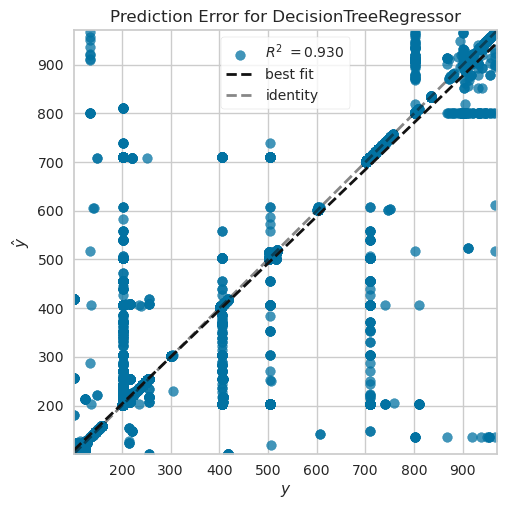

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [65]:
vizuluater = PredictionError(dec)
vizuluater.fit(x_train,y_train)
vizuluater.score(x_test,y_test)
vizuluater.poof()

# ****k-fold Cross Validation

In [66]:
#Train
score_train = cross_val_score(dec,x_train,y_train,scoring='neg_mean_squared_error',cv=16)
score_train = np.mean(score_train)
score_train

-3273.5352834829428

In [67]:
#To make it Positive
score_train = absolute(score_train)
score_train

3273.5352834829428

In [68]:
#Test
score_test = cross_val_score(dec,x_test,y_test,scoring='neg_mean_squared_error',cv=16)
score_test = np.mean(score_test)
score_test

-3539.449184643213

In [69]:
#To make it Positive
score_test = absolute(score_test)
score_test

3539.449184643213